In [12]:
import kagglehub
import pandas as pd 

path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import warnings
import numpy as np

In [7]:
# Disable warnings
warnings.filterwarnings("ignore")

In [10]:
df_hour = pd.read_csv(f"{path}/hour.csv")
df_hour.head().style.background_gradient(cmap="viridis")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


In [ ]:
df_day = pd.read_csv(f"{path}/day.csv")
df_day.head().style.background_gradient(cmap='viridis')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Dataset
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :

      - 1: Clear, Few clouds, Partly cloudy
      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
# Data information
print('Dataset information (hour.csv):')
print('Rows:', df_hour.shape[0])
print('Columns:', df_hour.shape[1])

print('\nDataset information (day.csv):')
print('Rows:', df_day.shape[0])
print('Column:', df_day.shape[1])

Dataset information (hour.csv):
Rows: 17379
Columns: 17

Dataset information (day.csv):
Rows: 731
Column: 16


In [ ]:
# Check Data Types
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
display(df_hour.isna().sum().to_frame(name='missing_values').style.background_gradient(cmap='Set2'))

,missing_values
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
df_day.isna().sum().to_frame(name='Toatl Missing values').style.background_gradient(cmap='viridis')

,Toatl Missing values
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#Duplicate values
print('Duplicate values in hour.csv:', df_hour.duplicated().sum())
print('Duplicate values in day.csv:', df_day.duplicated().sum())

Duplicate values in hour.csv: 0
Duplicate values in day.csv: 0


In [ ]:
# Check Outliers
#df_day
Q1=df_day['cnt'].quantile(0.25)
Q3=df_day['cnt'].quantile(0.75)
IQR=Q3-Q1

#define outliers boundaries
Lower_boundaries=Q1-1.5*IQR
Upper_boundaries=Q3 + 1.5*IQR

# Check for outliers
outiliers = df_day[(df_day['cnt']< Lower_boundaries) | (df_day['cnt']>Upper_boundaries)]
outiliers.head().style.background_gradient(cmap='viridis')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
#df_hour
Q1=df_hour['cnt'].quantile(0.25)
Q3=df_hour['cnt'].quantile(0.75)
IQR=Q3-Q1

#define outliers boundaries
Lower_boundaries=Q1-1.5*IQR
Upper_boundaries=Q3+1.5*IQR

#identify outlier
outiliers=df_day[(df_day['cnt']>Lower_boundaries) | (df_day['cnt']<Upper_boundaries)]
outiliers.head().style.background_gradient(cmap='viridis')



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
outiliers.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### Outliers:
No outliers were found in day.csv.

The outliers in hour.csv may indicate certain hours with unusually high spikes or drops in rentals, such as during rush hours or extreme weather conditions.

The absence of outliers in day.csv suggests that daily rental trends are relatively stable, with no significant extreme fluctuations.

In [ ]:
# removing outliers

print('Shape befor removing outliers:', df_hour.shape)
df_hour=df_hour[(df_hour['cnt']>=Lower_boundaries) & (df_hour['cnt']<=Upper_boundaries)]
print('shape after removing outliers:', df_hour.shape)

Shape befor removing outliers: (17379, 17)
shape after removing outliers: (16874, 17)


In [ ]:
#convert dteday column to 'datetimme'
df_hour['dteday']=pd.to_datetime(df_hour['dteday'])
df_day['dteday']=pd.to_datetime(df_day['dteday'])

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

In [ ]:
#craeting  new time based feature
df_hour['year'] =df_hour['dteday'].dt.year
df_hour['month']= df_hour['dteday'].dt.month
df_hour['day']=df_hour['dteday'].dt.day
df_hour['day_of_week']= df_hour['dteday'].dt.day_name()
df_hour['hour_of_day'] = df_hour['hr']

df_day['year']=df_day['dteday'].dt.year
df_day['month']=df_day['dteday'].dt.month
df_day['day']=df_day['dteday'].dt.day
df_day['day_of_week']=df_day['dteday'].dt.day_name()

In [ ]:
#season value
season_map= {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
df_hour['season_name']=df_hour['season'].map(season_map)
df_day['season_name']=df_day['season'].map(season_map)

#weather
weather_map={
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Precipitation',
    4: 'Heavy Precipitation'
}
df_hour['weather_condition']=df_hour['weathersit'].map(weather_map)
df_day['weather_condition']=df_day['weathersit'].map(weather_map)

In [ ]:
# percantage of casual vs registered users
df_hour['casual_pct']=df_hour['casual']/df_hour['cnt']*100
df_hour['registeres_pct']= df_hour['registered']/df_hour['cnt']*100

df_day['casual_pct']= df_day['casual']/df_day['cnt']*100
df_day['registered_pct'] = df_day['casual']/ df_day['cnt']*100


In [ ]:
df_hour.info()
df_hour.head().style.background_gradient(cmap='viridis')

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            16874 non-null  int64         
 1   dteday             16874 non-null  datetime64[ns]
 2   season             16874 non-null  int64         
 3   yr                 16874 non-null  int64         
 4   mnth               16874 non-null  int64         
 5   hr                 16874 non-null  int64         
 6   holiday            16874 non-null  int64         
 7   weekday            16874 non-null  int64         
 8   workingday         16874 non-null  int64         
 9   weathersit         16874 non-null  int64         
 10  temp               16874 non-null  float64       
 11  atemp              16874 non-null  float64       
 12  hum                16874 non-null  float64       
 13  windspeed          16874 non-null  float64       
 14  casual     

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week,hour_of_day,season_name,weather_condition,casual_pct,registeres_pct
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,2011,1,1,Saturday,0,Spring,Clear/Partly Cloudy,18.750000,81.250000
1,2,2011-01-01 00:00:00,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,2011,1,1,Saturday,1,Spring,Clear/Partly Cloudy,20.000000,80.000000
2,3,2011-01-01 00:00:00,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,2011,1,1,Saturday,2,Spring,Clear/Partly Cloudy,15.625000,84.375000
3,4,2011-01-01 00:00:00,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13,2011,1,1,Saturday,3,Spring,Clear/Partly Cloudy,23.076923,76.923077
4,5,2011-01-01 00:00:00,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1,2011,1,1,Saturday,4,Spring,Clear/Partly Cloudy,0.000000,100.000000


In [ ]:
df_hour.select_dtypes(include=["number"]).describe().T.style.background_gradient(cmap="viridis")

,count,mean,std,min,25%,50%,75%,max
instant,16874.000000,8542.168899,5007.766040,1.000000,4219.250000,8438.500000,12832.750000,17379.000000
season,16874.000000,2.490399,1.111966,1.000000,1.000000,2.000000,3.000000,4.000000
yr,16874.000000,0.487733,0.499864,0.000000,0.000000,0.000000,1.000000,1.000000
mnth,16874.000000,6.513275,3.462438,1.000000,4.000000,7.000000,10.000000,12.000000
hr,16874.000000,11.458101,6.962144,0.000000,5.000000,11.000000,18.000000,23.000000
holiday,16874.000000,0.029513,0.169244,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,16874.000000,2.997748,2.013054,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,16874.000000,0.678618,0.467021,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,16874.000000,1.430663,0.642689,1.000000,1.000000,1.000000,2.000000,4.000000
temp,16874.000000,0.492650,0.192455,0.020000,0.340000,0.500000,0.640000,1.000000


### Descriptive Statistics:
The average number of bike rentals per hour (cnt) is 173 bikes, with a maximum of 642.

Registered users consistently rent more bikes than casual users.

The average temperature is similar to the daily dataset, around 0.49, indicating consistent temperature measurement across both datasets.

In [ ]:
df_day.select_dtypes(include=['number']).describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
instant,731.000000,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.000000,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.000000,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.000000,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.000000,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.000000,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.000000,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.000000,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.000000,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.000000,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


### Descriptive Statistics:
The average total number of bike rentals (cnt) is approximately 4,504 bikes per day.

Registered users significantly outnumber casual users, with averages of 3,656 vs. 848.

The average temperature (temp) is 0.49 (on a scale from 0 to 1), with a maximum of 0.86, indicating a wide seasonal variation.

The average wind speed (windspeed) is 0.19, with a maximum of 0.51.

Weather distribution (weathersit) shows that most days fall into categories 1 and 2 (clear to light clouds).

In [ ]:
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'season_name', 'weather_condition', 'casual_pct',
       'registeres_pct'],
      dtype='object')

In [ ]:
#categorical distribution 
print('Season distribution in daily data:')
season_name=df_hour['season_name'].value_counts()
display(season_name.to_frame().style.background_gradient(cmap='viridis'))

print('\nweather distribution in daily data')
weather_condition=df_hour['weather_condition'].value_counts()
display(weather_condition.to_frame().style.background_gradient(cmap='viridis'))

print('\nworkingday distribution in daily data')
workingday= df_hour['workingday'].value_counts()
display(workingday.to_frame().style.background_gradient(cmap='viridis'))

print('\nHoliday distribution in daily data')
holiday=df_hour['holiday'].value_counts()
display(holiday.to_frame().style.background_gradient(cmap='viridis'))


Season distribution in daily data:


,count
season_name,
Fall,4298
Summer,4253
Spring,4223
Winter,4100



weather distribution in daily data


,count
weather_condition,
Clear/Partly Cloudy,11020
Mist/Cloudy,4444
Light Precipitation,1407
Heavy Precipitation,3



workingday distribution in daily data


,count
workingday,
1,11451
0,5423



Holiday distribution in daily data


,count
holiday,
0,16376
1,498


In [ ]:
#categorical distribution 
print('Season distribution in daily data:')
season_name=df_day['season_name'].value_counts()
display(season_name.to_frame().style.background_gradient(cmap='viridis'))

print('\nweather distribution in daily data')
weather_condition=df_day['weather_condition'].value_counts()
display(weather_condition.to_frame().style.background_gradient(cmap='viridis'))

print('\nworkingday distribution in daily data')
workingday= df_day['workingday'].value_counts()
display(workingday.to_frame().style.background_gradient(cmap='viridis'))

print('\nHoliday distribution in daily data')
holiday=df_day['holiday'].value_counts()
display(holiday.to_frame().style.background_gradient(cmap='viridis'))

Season distribution in daily data:


,count
season_name,
Fall,188
Summer,184
Spring,181
Winter,178



weather distribution in daily data


,count
weather_condition,
Clear/Partly Cloudy,463
Mist/Cloudy,247
Light Precipitation,21



workingday distribution in daily data


,count
workingday,
1,500
0,231



Holiday distribution in daily data


,count
holiday,
0,710
1,21


#### Categorical Features Distribution (Day.csv):

**Season Distribution (season):**

-  Fall (season = 3) has the highest number of days (188), followed by summer (184) and Spring (181). inter has the fewest days (178).
-  This indicates a relatively balanced number of days across all seasons.

**Weather Condition Distribution (weathersit):**

-  Most days (463) fall into weather category 1 (clear or partly cloudy).
-  247 days fall into category 2 (cloudy or misty).
-  Only 21 days are in category 3 (light rain or snow).
-  There are no days with weather category 4 (heavy rain or storms), indicating that people tend to avoid biking in     extreme weather conditions.

**Working Day Distribution (workingday):**

-  500 days are working days (workingday = 1), while 231 are holidays or weekends (workingday = 0).
-  This suggests that most bike rentals occur on working days.

**Holiday Distribution (holiday):**

-  Only 21 days are official holidays, while 710 days are not.
-  This indicates that most bike rentals happen on regular (non-holiday) days.

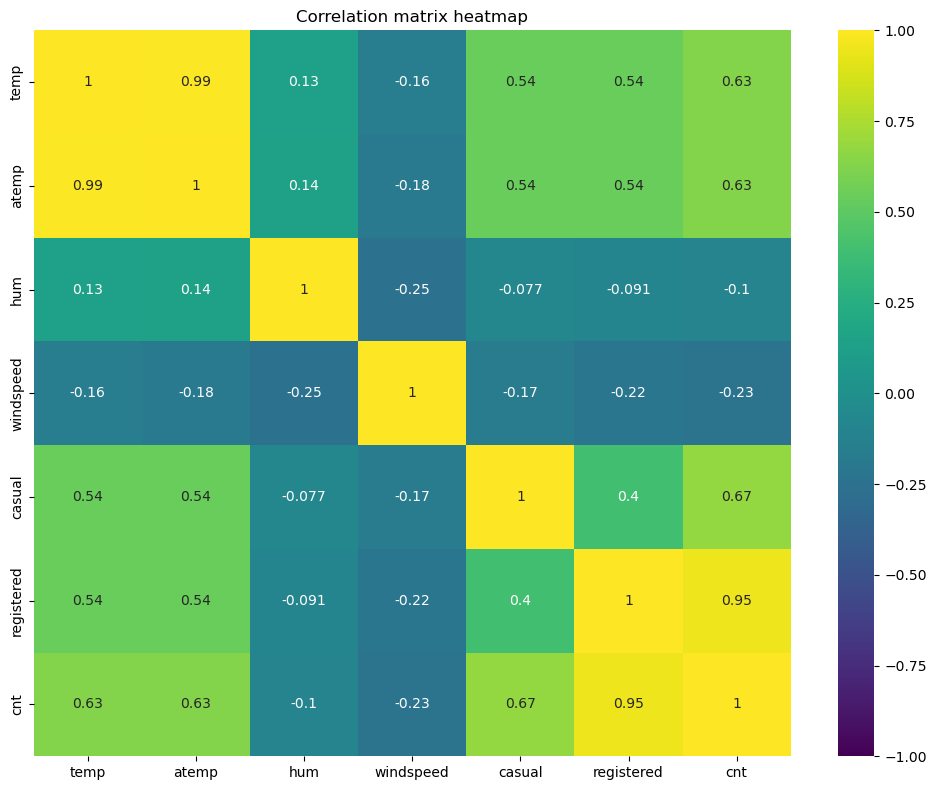


Correlation matrix:
                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012   
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192   
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089   
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449   
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282   
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000   
cnt         0.627494  0.631066 -0.100659  -0.234545  0.672804    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.100659  
windspeed  -0.234545  
casual      0.672804  
registered  0.945517  
cnt         1.000000  


In [ ]:
# correlation matrix
correlation_matrix=df_day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix heatmap')
plt.tight_layout()
plt.show()

print("\nCorrelation matrix:")
print(correlation_matrix)


#### Correlation Matrix:
**How Temperature Affects Bike Rentals:**
- The temperature (temp) has a good positive connection (0.63) with total bike rentals (cnt). This means when it’s warm, more people like to rent bikes. 
- The "feels like" temperature (atemp) also has almost the same link (0.63) with cnt, so it matters a lot too.

**How Humidity and Wind Speed Play a Role:**
- Humidity (hum) has a small negative effect (-0.10) on bike rentals. So, when it’s too humid, people might not want to bike so much. 
- Wind speed (windspeed) has a bit stronger negative effect (-0.23) with rentals, showing that windy days make people less interested in biking.

**How Different Users Matter:**
- Casual users (casual) have a nice positive tie (0.67) with total rentals (cnt), meaning they help increase the numbers. - Registered users (registered) have a very big connection (0.95) with cnt, so it’s clear that most bike rentals come from these regular users.

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,year,month,day,day_of_week,season_name,weather_condition,casual_pct,registered_pct
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985,2011,1,1,Saturday,Spring,Mist/Cloudy,33.604061,33.604061
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,670,801,2011,1,2,Sunday,Spring,Mist/Cloudy,16.354557,16.354557
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349,2011,1,3,Monday,Spring,Clear/Partly Cloudy,8.895478,8.895478
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1454,1562,2011,1,4,Tuesday,Spring,Clear/Partly Cloudy,6.914213,6.914213
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1518,1600,2011,1,5,Wednesday,Spring,Clear/Partly Cloudy,5.125000,5.125000


In [ ]:
seasonal_stats = df_day.groupby("season_name")["cnt"].agg(["mean", "sum"]).sort_values("sum", ascending=False)
seasonal_stats

,mean,sum
season_name,,
Fall,5644.303191,1061129
Summer,4992.331522,918589
Winter,4728.162921,841613
Spring,2604.132597,471348


In [ ]:
print(type(seasonal_stats.dtypes))

<class 'pandas.core.series.Series'>


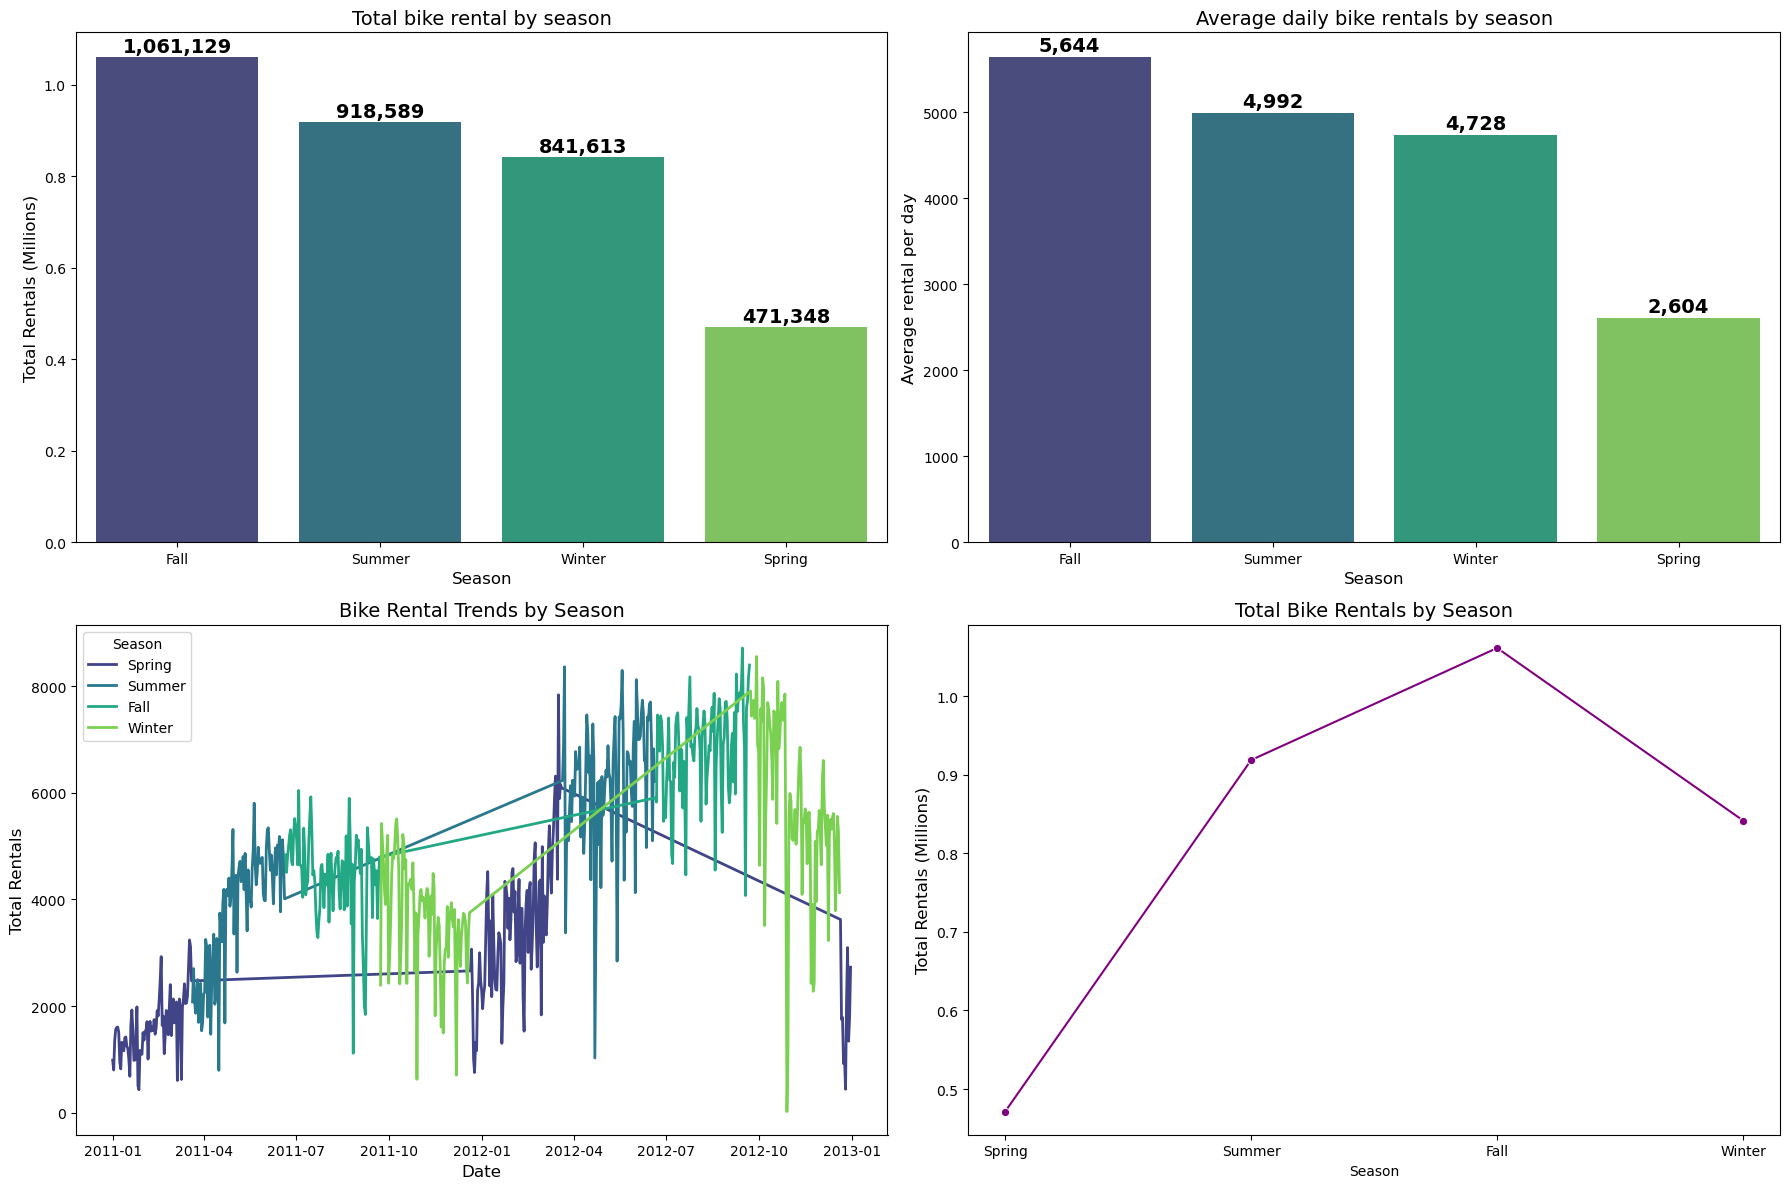

In [ ]:
#figure with 2 ros and 2 column 
fig, axes=plt.subplots(2,2, figsize=(18,12))

#bar chat 1
sns.barplot(x=seasonal_stats.index, y=seasonal_stats['sum'], palette='viridis', linewidth=2, ax=axes[0,0])
axes[0,0].set_title('Total bike rental by season', fontsize=14)
axes[0,0].set_ylabel('Total Rentals (Millions)', fontsize=12)
axes[0,0].set_xlabel('Season', fontsize=12)
axes[0,0].yaxis.set_major_formatter(lambda x, _: f'{x/1e6:.1f}')

#value label
for i, v in enumerate(seasonal_stats['sum']):
    axes[0,0].text(
        i,v+10000, f'{v:,.0f}', ha='center', fontsize=14, fontweight='bold'
    )

# Bar chart 2 - average
sns.barplot(x=seasonal_stats.index, y=seasonal_stats['mean'], palette='viridis', ax=axes[0,1])
axes[0,1].set_title('Average daily bike rentals by season', fontsize=14)
axes[0,1].set_xlabel('Season', fontsize=12)
axes[0,1].set_ylabel('Average rental per day', fontsize=12)
for i, v in enumerate(seasonal_stats['mean']):
    axes[0,1].text(
        i,v+70, f'{v:,.0f}', ha='center', fontsize=14, fontweight='bold'
    )

# chart 3-Line chart
sns.lineplot(data=df_day, x='dteday', y='cnt', hue='season_name', palette='viridis', linewidth=2, ax=axes[1,0])
axes[1, 0].set_title("Bike Rental Trends by Season", fontsize=14)
axes[1, 0].set_ylabel("Total Rentals", fontsize=12)
axes[1, 0].set_xlabel("Date", fontsize=12)
axes[1, 0].legend(title="Season")

# Line Chart 4- Total Rentals per Season
sns.lineplot(x="season_name", y="cnt", data=df_day, estimator="sum", ci=None, marker="o", color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Total Bike Rentals by Season", fontsize=14)
axes[1, 1].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[1, 1].set_xlabel("Season")
axes[1, 1].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")
plt.tight_layout()
plt.show()

### Insight
**Total Bike Rentals by Season (Bar Chart - Top Left):**
- Fall has the biggest number of bike rentals, about 1.06 million, which is the most.
- Summer and Winter follow, maybe because Fall weather is nice for biking.
- Spring has the smallest rentals, only around 471 thousand, half of Fall’s total. This could be because Spring weather is not good or people don’t bike much.

**Average Daily Bike Rentals by Season (Bar Chart - Top Right):**
- Fall also has the highest daily average, about 5,644 rentals per day, showing it’s a busy time.
- This means Fall is a good season for the bike rental business.
- Spring has the lowest average, around 2,604 per day, maybe due to bad weather or less interest.
- Summer and Winter have decent averages, so people still rent bikes even with hot or cold weather.

**Bike Rental Trends by Season (Line Chart - Bottom Left):**
- Rentals slowly go up from the year’s start, hit a peak in the middle, and drop at the end.
- This shows a clear season pattern for biking.
- There are big day-to-day changes, especially in Summer and Fall, maybe because of weather or how people behave.
- This tells us weather and lifestyle affect biking a lot.

**Total Rentals per Season (Line Chart - Bottom Right):**
- Rentals increase from Spring to Summer to Fall, then decrease in Winter, showing a yearly cycle. This pattern is useful for making business plans.
- Fall is the best season for bike rentals, while Spring has the least demand. Businesses can add more bikes in Fall or give offers in Spring to get more riders.
- Fall is the top season for both total and daily rentals.
- Spring has the lowest rental numbers, maybe because of bad weather or less interest.
- Winter still has good rentals, perhaps because some people enjoy biking in cold weather.
- These season trends can help businesses plan, like adding bikes in Fall or doing sales in Spring.

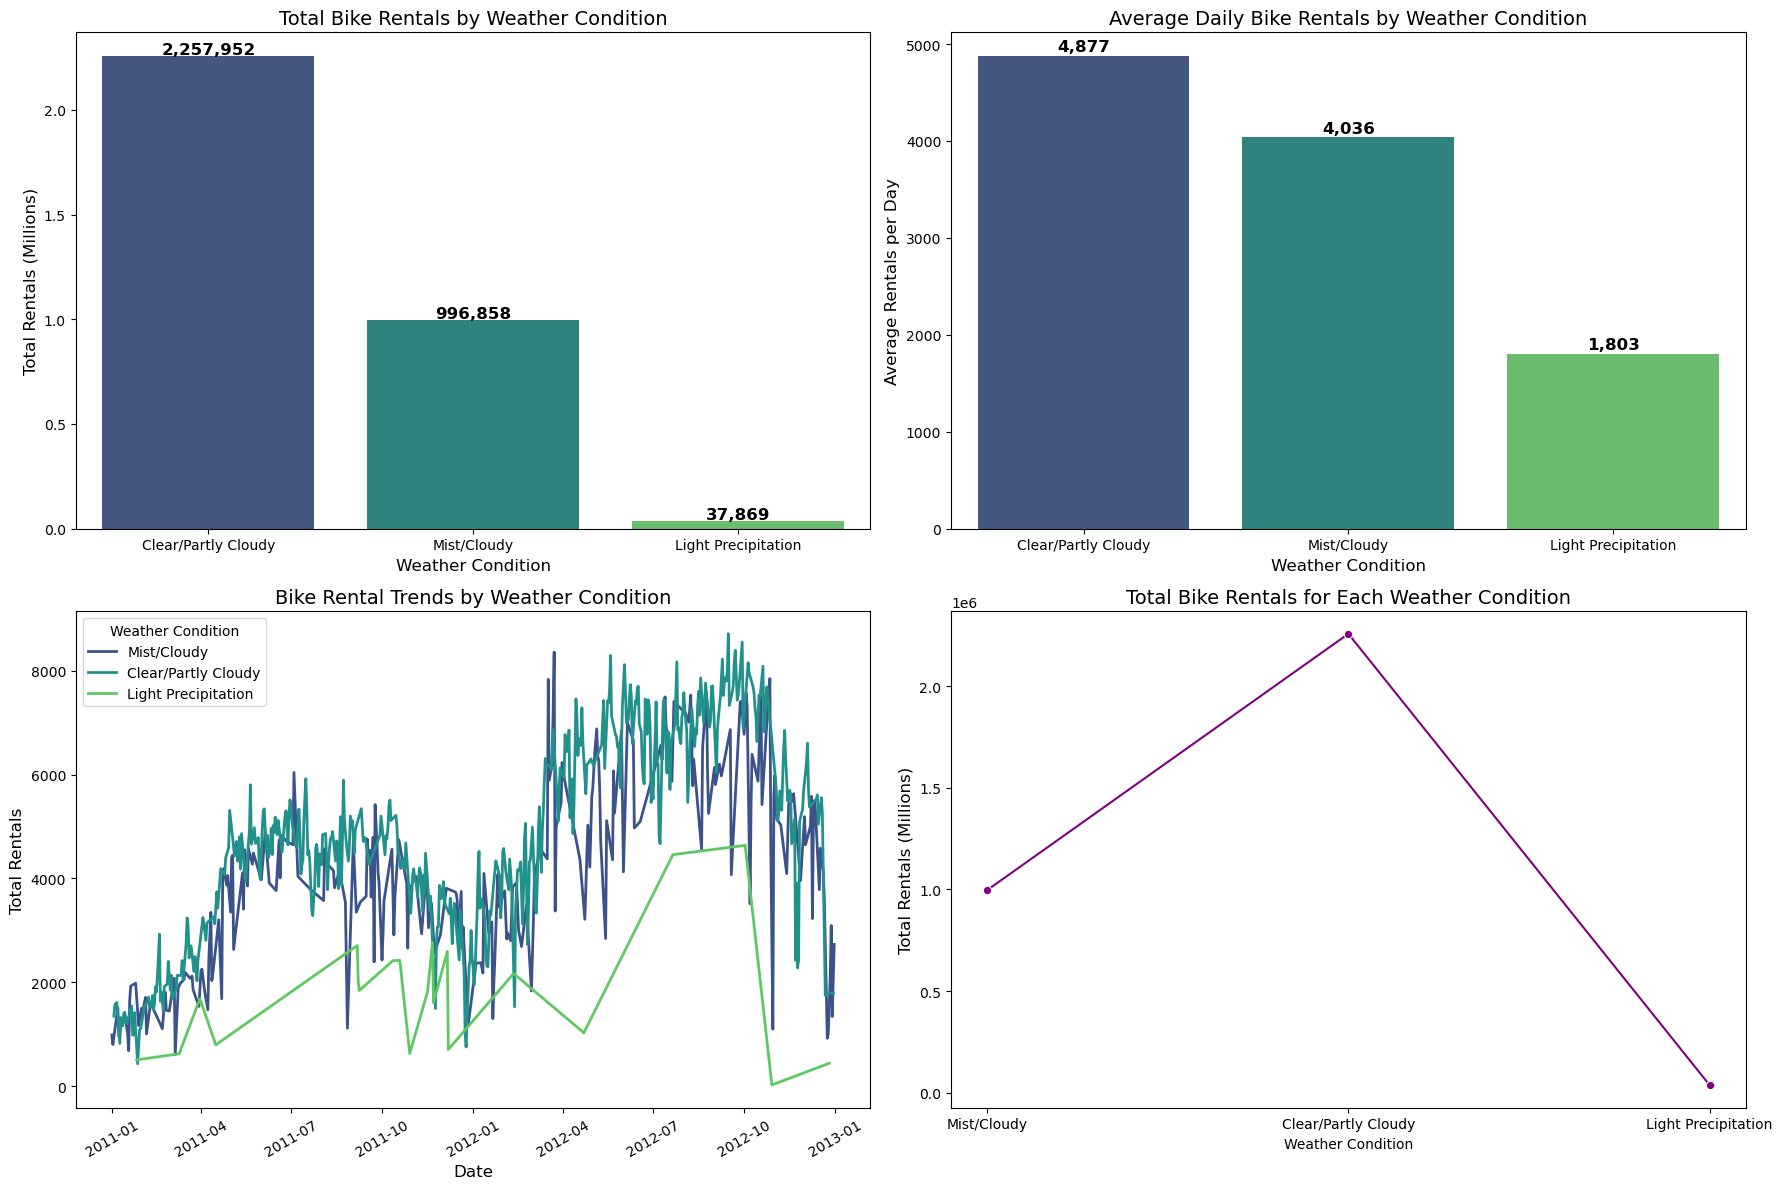

In [ ]:
#calculating Rentsl statistics based on weather conditions
weather_stats=df_day.groupby('weather_condition')['cnt'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

fig, axes = plt.subplots(2,2, figsize=(18,12))
# bar chart -1
sns.barplot(x=weather_stats.index, y=weather_stats['sum'], palette='viridis', ax=axes[0,0])
axes[0, 0].set_title("Total Bike Rentals by Weather Condition", fontsize=14)
axes[0, 0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0, 0].set_xlabel("Weather Condition", fontsize=12)
axes[0, 0].tick_params(axis="x", rotation=0)
axes[0, 0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")
#label
for i, v in enumerate(weather_stats['sum']):
    axes[0,0].text(
        i, v +10000, f'{v:,.0f}', ha='center', fontsize=12, fontweight='bold'
    )

# chart- 2 Bar chart
sns.barplot(x=weather_stats.index, y=weather_stats['mean'], palette='viridis', ax=axes[0,1])
axes[0, 1].set_title("Average Daily Bike Rentals by Weather Condition", fontsize=14)
axes[0, 1].set_ylabel("Average Rentals per Day", fontsize=12)
axes[0, 1].set_xlabel("Weather Condition", fontsize=12)
axes[0, 1].tick_params(axis="x", rotation=0)

# labels above each bar
for i, v in enumerate(weather_stats["mean"]):
    axes[0, 1].text(i, v + 50, f"{v:,.0f}", ha="center", fontsize=12, fontweight="bold")

# char -3 Line chart
sns.lineplot(data=df_day, x='dteday', y='cnt', hue='weather_condition', palette='viridis', linewidth=2, ax=axes[1,0])
axes[1, 0].set_title("Bike Rental Trends by Weather Condition", fontsize=14)
axes[1, 0].set_ylabel("Total Rentals", fontsize=12)
axes[1, 0].set_xlabel("Date", fontsize=12)
axes[1, 0].tick_params(axis="x", rotation=30)
axes[1, 0].legend(title="Weather Condition")

## Line Chart 4: Total Bike Rentals for Each Weather Condition
sns.lineplot(x="weather_condition", y="cnt", data=df_day, estimator="sum", ci=None, marker="o", color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Total Bike Rentals for Each Weather Condition", fontsize=14)
axes[1, 1].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[1, 1].set_xlabel("Weather Condition")
axes[1, 1].tick_params(axis="x", rotation=0)
axes[0, 0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

plt.tight_layout()
plt.show()

### Insight 
**Total Bike Rentals by Weather Condition (Bar Chart - Top Left):**
- The most bike rentals happen when it’s Clear/Partly Cloudy, around 2.26 million rentals.
- Rentals go down a lot when it’s Mist/Cloudy, about 996 thousand rentals.
- Light Precipitation (like rain or snow) has very few rentals, only around 37 thousand, showing rain stops people from biking.

**Average Daily Bike Rentals by Weather Condition (Bar Chart - Top Right):**
- The highest daily average is on Clear/Partly Cloudy days, about 4,877 rentals per day.
- Mist/Cloudy days still have a good average, around 4,036 rentals per day, but less than clear days.
- Light Precipitation has a very low average, only 1,803 rentals per day, showing rain makes people less interested.

**Bike Rental Trends by Weather Condition (Line Chart - Bottom Left):**
- Bike rentals go up over time, especially on clear and cloudy days.
- There’s a big drop on days with light precipitation, meaning people don’t like biking in rain.
- Daily changes are big, maybe because of temperature or if it’s a weekday or weekend.

**Total Rentals for Each Weather Condition (Line Chart - Bottom Right):**
- This chart shows Clear/Partly Cloudy is the best weather for bike rentals.
- Mist/Cloudy still has a good share and could be improved more.
- Light Precipitation has very few rentals, so we need other plans for rainy days.
- People love renting bikes when it’s clear or partly cloudy.
- Foggy or cloudy weather still gets some rentals, but demand goes down a bit.
- In light rain, demand falls a lot, so people might use other transport or skip biking.

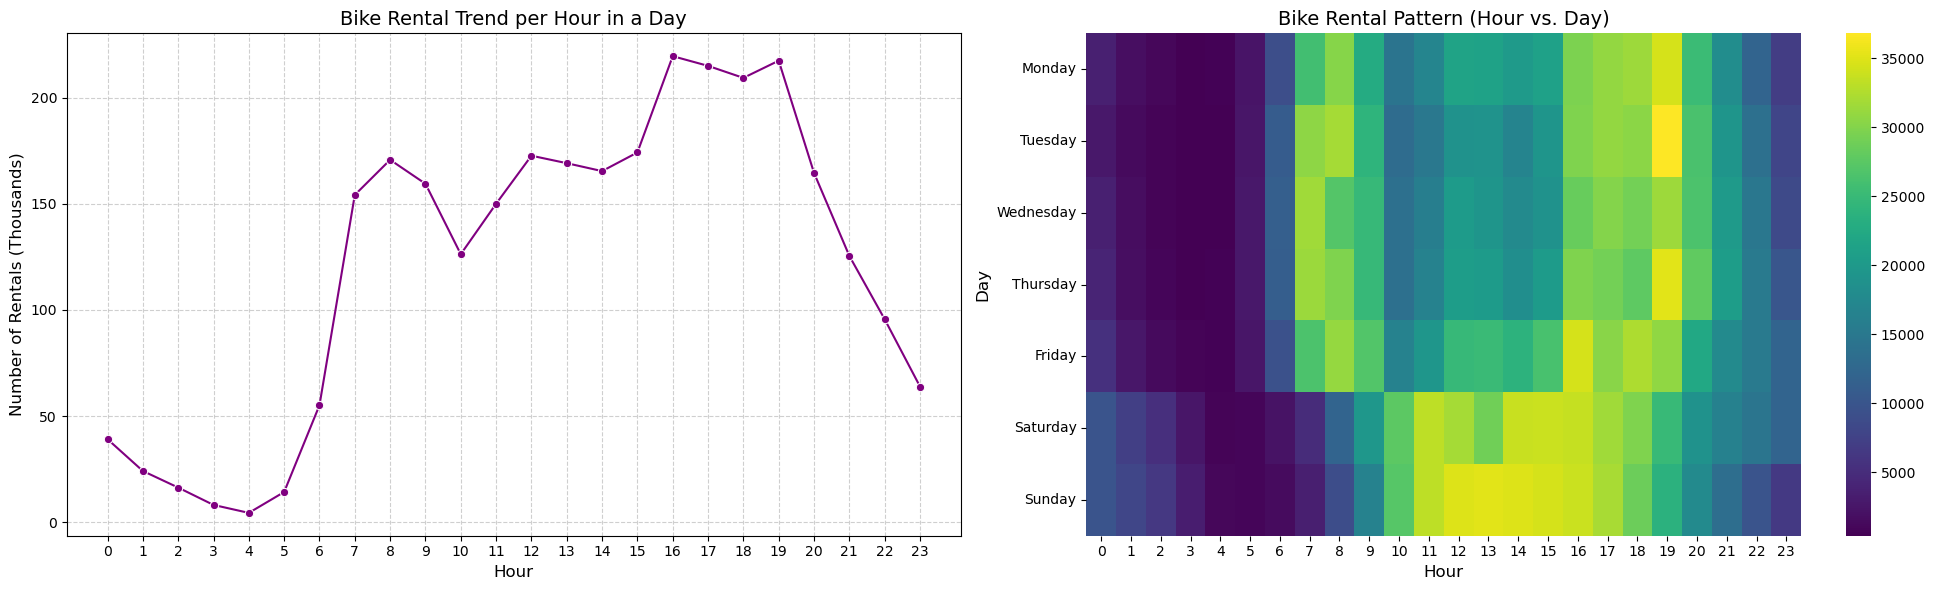

In [ ]:
#hourly trends in bike rentals throughout the day
fig, axes=plt.subplots(1, 2, figsize=(20,6))
sns.lineplot(x='hr', y='cnt', estimator='sum', data=df_hour, color='purple', ci=None, marker='o', ax=axes[0])
axes[0].set_title("Bike Rental Trend per Hour in a Day", fontsize=14)
axes[0].set_ylabel("Number of Rentals (Thousands)", fontsize=12)
axes[0].set_xlabel("Hour", fontsize=12)
axes[0].set_xticks(range(0,24,1))
axes[0].grid(axis='both', linestyle='--', alpha=0.6)
axes[0].yaxis.set_major_formatter(lambda x, _: f'{x/1e3:,.0f}')

# Heatmap - Bike Rentals per Hour and Day
# Order of days in the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = df_hour.pivot_table(values="cnt", index="day_of_week", columns="hr", aggfunc="sum")
heatmap_data = heatmap_data.reindex(day_order)  # Reorder by correct day sequence

sns.heatmap(heatmap_data, cmap="viridis", ax=axes[1])
axes[1].set_title("Bike Rental Pattern (Hour vs. Day)", fontsize=14)
axes[1].set_ylabel("Day", fontsize=12)
axes[1].set_xlabel("Hour", fontsize=12)

plt.tight_layout()
plt.show()

### Insight
**Bike Rental Trend per Hour in a Day:**
- Bike rentals are very low in the early morning, from 00:00 to 05:00, with the least at around 04:00.
- There’s a big jump in rentals between 07:00 and 09:00, with the first high point at 08:00, about 160,000 rentals.
- After that, rentals go down until midday, then start going up again in the late afternoon.
- The biggest peak happens from 16:00 to 19:00, with the top at 18:00, around 210,000 rentals.
- After 19:00, rentals slowly drop as night comes.
- The morning rush shows bikes are used to go to work or school.
- The evening rush means bikes are also used to come back home, for fun, or exercise.
- This pattern tells us most users are workers or students who use bikes a lot during busy times.

**Bike Rental Pattern (Hour vs. Day):**
- Monday to Friday: Rentals have two big peaks—one in the morning around 08:00 and one in the evening around 19:00, like rush hours.
- Saturday to Sunday: The pattern changes, with rentals going up slowly in the morning and peaking evenly from late morning to evening, about 10:00 to 18:00.
- Bright colors on the heatmap show where rentals are highest, especially in workday afternoons.
- Weekdays have a regular pattern because of fixed work and school timings.
- Weekends have a more relaxed pattern, with rentals growing slowly and spread out all day.
- This means bikes are used for going to work on weekdays and for fun on weekends.

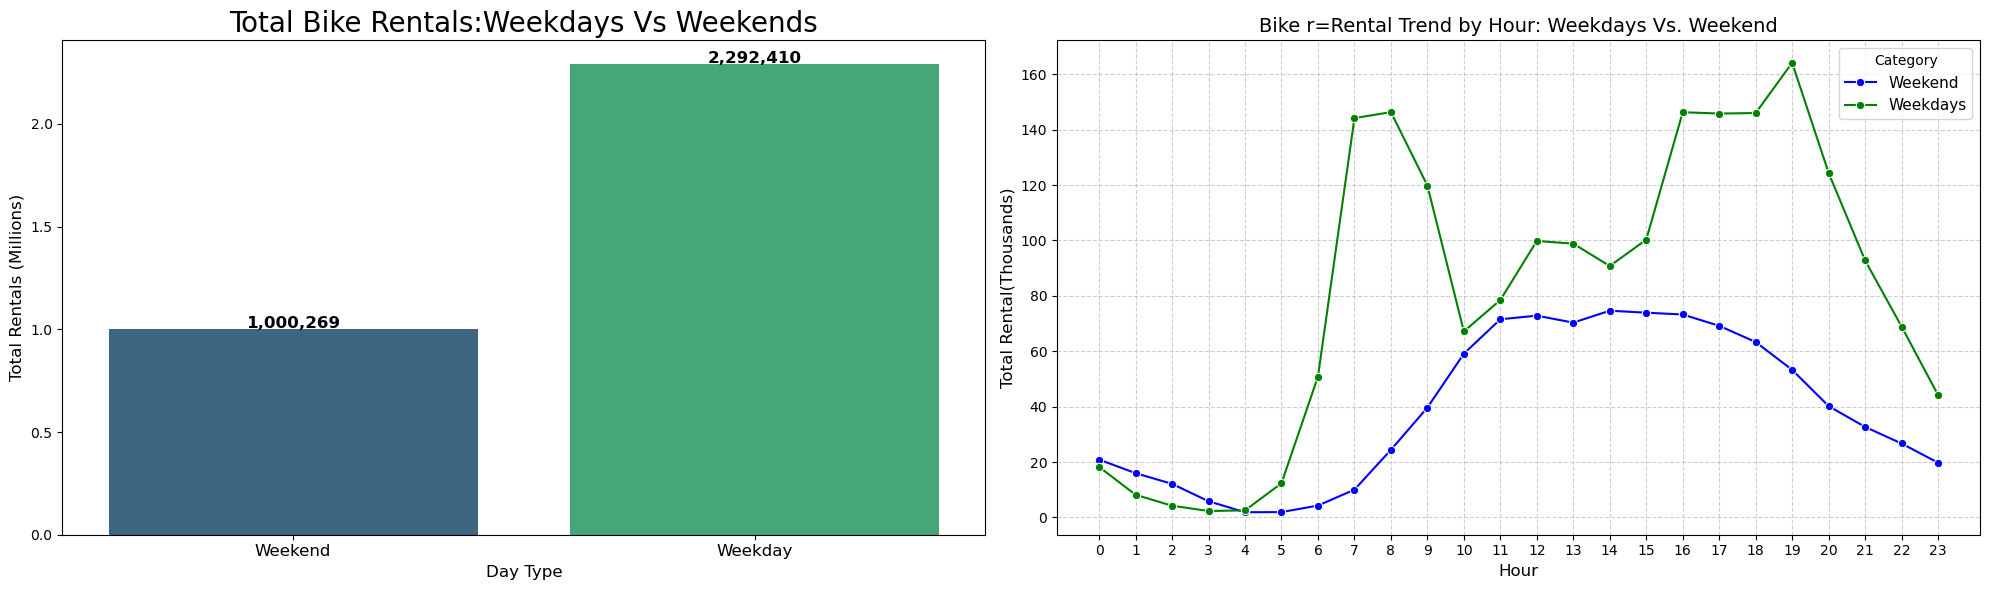

In [ ]:
# differences in rental patterns between weekdays and weekends

fig, axes=plt.subplots(1,2,figsize=(20,6))
sns.barplot(x='workingday', y='cnt', estimator='sum', data=df_day, ci=None, palette='viridis', ax=axes[0])
axes[0].set_title('Total Bike Rentals:Weekdays Vs Weekends', fontsize=20)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Weekend", "Weekday"], fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].set_xlabel("Day Type", fontsize=12)
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

#label
for i, v in enumerate(df_day.groupby('workingday')['cnt'].sum()):
    axes[0].text(i, v+5000, f'{v:,.0f}', ha='center', fontsize=12, fontweight='bold')


sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_hour, estimator='sum', ci=None, marker='o', palette=['blue', 'green'], ax=axes[1])
axes[1].set_title('Bike r=Rental Trend by Hour: Weekdays Vs. Weekend', fontsize=14)
axes[1].set_xlabel('Hour', fontsize=12)
axes[1].set_ylabel('Total Rental(Thousands)', fontsize=12)
axes[1].set_xticks(range(0,24,1))
axes[1].grid(axis='both', linestyle='--', alpha=0.6)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e3:.0f}'))
axes[1].legend(['Weekend', 'Weekdays'], title='Category', fontsize=11)
plt.tight_layout()
plt.show()

### Insight
**Total Bike Rentals: Weekdays vs. Weekends (Bar Chart - Left):**
- Weekdays have a total of 2,292,410 bike rentals.
- Weekends have 1,000,269 bike rentals.
- Bike rentals on weekdays are about 2.3 times more than on weekends.
- People use bikes more on weekdays, probably to go to work or school.
- On weekends, fewer people rent bikes, maybe because they use them for fun or relaxing, not for daily travel.

**Bike Rental Trend Throughout the Day: Weekdays vs. Weekends (Line Chart - Right):**

  **Weekdays: Rentals have two big peaks:**
- Around 08:00, about 145,000 rentals, likely for going to work or school.
- Around 18:00–19:00, about 160,000 rentals, probably for coming back home.
- After 19:00, rentals drop a lot.

**Weekends: Rentals are more steady, no big jumps:**
  -   They slowly go up from morning and hit a high between 10:00–16:00, around 70,000–80,000 rentals per hour.
  -   Rentals stay higher during the day than early morning or night, but no sharp peaks like weekdays.



- Weekdays have clear morning and evening peaks, showing bikes are used a lot for travel, especially to and from work.
- Weekends have rentals spread out more, meaning people use bikes for fun, exercise, or casual time, not just commuting.
- Evenings on weekdays have more rentals than weekends, maybe because of traffic or people wanting to go home.

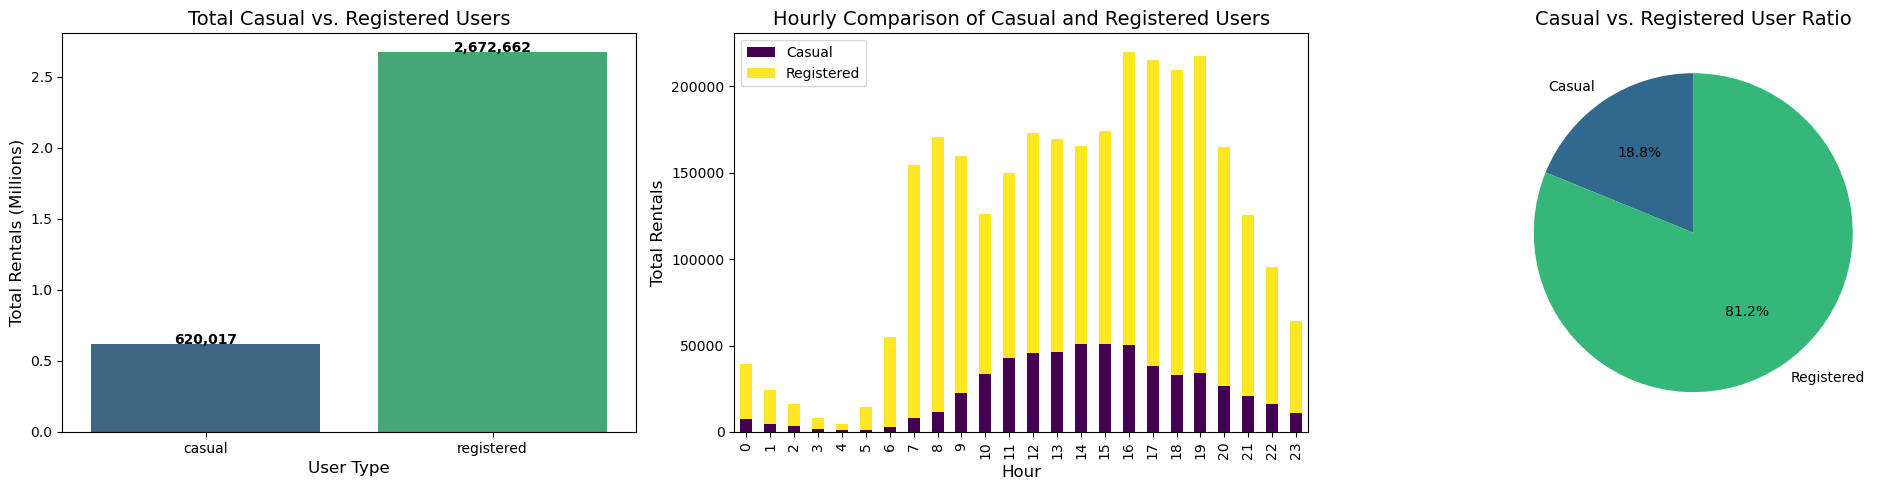

In [ ]:
#casual and registered users distributed over different time periods
fig, axes = plt.subplots(1,3, figsize=(20, 5))
user_distribution = df_day[["casual", "registered"]].sum()
sns.barplot(x=user_distribution.index, y=user_distribution.values, palette="viridis", ax=axes[0])
axes[0].set_title("Total Casual vs. Registered Users", fontsize=14)
axes[0].set_xlabel("User Type", fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")
for i, v in enumerate(user_distribution.values):
    axes[0].text(i, v + 1500, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")


hourly_grouped = df_hour.groupby("hr")[["casual", "registered"]].sum().reset_index()
hourly_grouped.plot(x="hr", kind="bar", stacked=True, colormap="viridis", ax=axes[1])
axes[1].set_title("Hourly Comparison of Casual and Registered Users", fontsize=14)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_ylabel("Total Rentals", fontsize=12)
axes[1].legend(["Casual", "Registered"])

axes[2].pie(user_distribution, labels=["Casual", "Registered"], autopct="%1.1f%%", colors=sns.color_palette("viridis", 2), startangle=90)
axes[2].set_title("Casual vs. Registered User Ratio", fontsize=14)
plt.tight_layout()
plt.show()

### Insight
**Total Casual vs. Registered Users (Bar Chart - Left):**
- Registered users have a lot more rentals, totaling 2,672,662 bikes.
- Casual users have much less, only 620,017 rentals.
- Registered users rent bikes more than 4 times as much as casual users.
- Most people renting are registered, probably using bikes every day for work or school.
- Casual users are fewer, maybe because they only rent for fun or sometimes.

**Hourly Comparison of Casual and Registered Users (Bar Chart - Center):**
- Registered users rent a lot during busy times, especially from 07:00–09:00 and 17:00–19:00.
- Casual users are more active in the middle of the day, slowly going up from 10:00–16:00.
- In busy hours, registered users rent way more than casual users.
- Registered users are busy on weekdays, matching people going to work or school.
- Casual users like the daytime more, maybe for fun, seeing places, or relaxing.
- The big jump for registered users in morning and evening shows they commute, while casual rentals spread out without big peaks.

**Casual vs. Registered User Ratio (Pie Chart - Right):**
- Registered users take up 81.2% of all rentals, while casual users have just 18.8%.
- Most people are loyal subscribers, so the business should focus on keeping them happy and improving things for them.
- Casual users are a small part, so there’s a chance to grow this group with offers or easy plans for non-registered people.

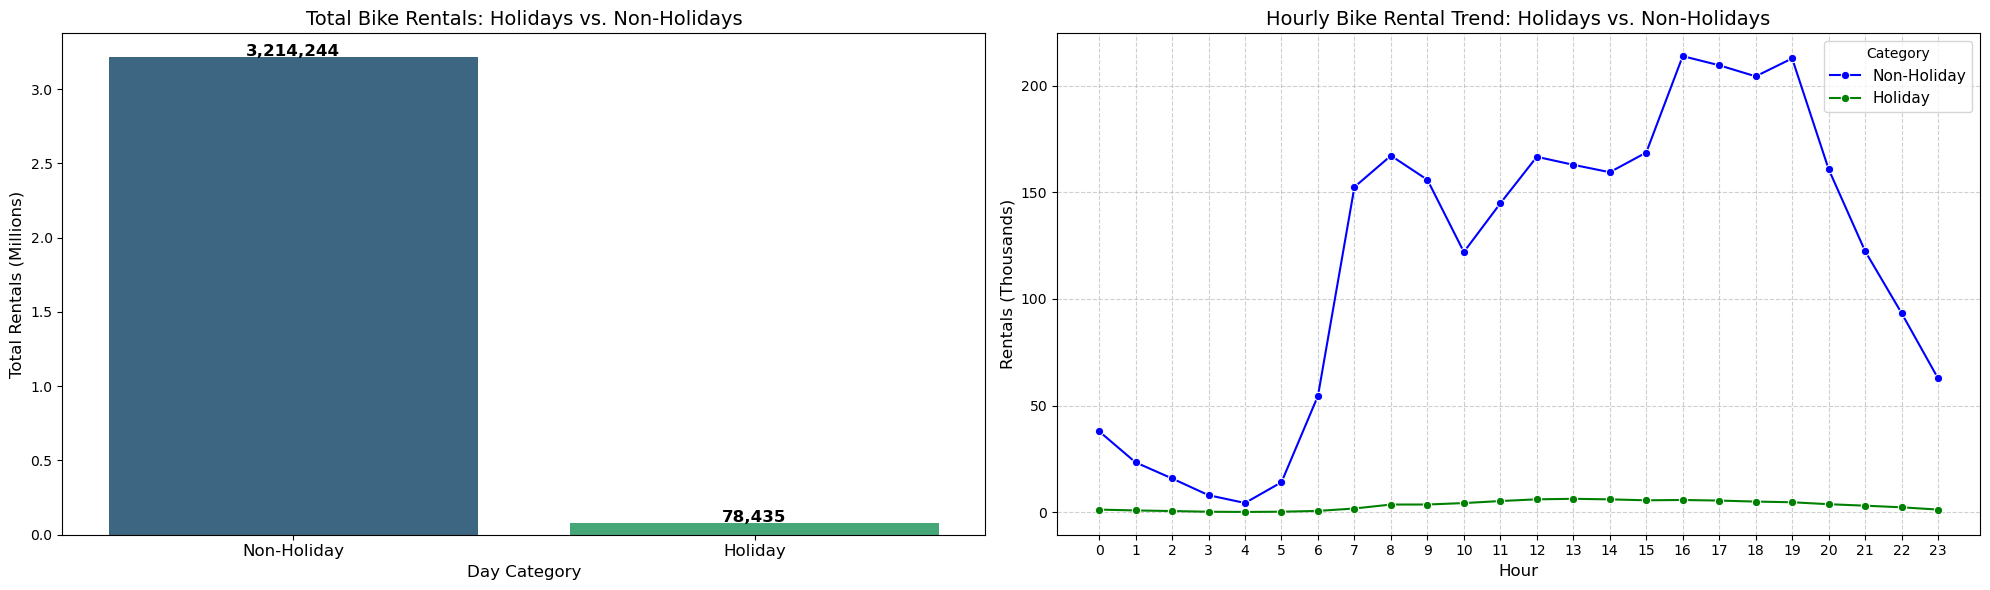

In [ ]:
#holidays impact bike rental patterns compared to regular days
fig, axes =plt.subplots(1, 2, figsize=(20,6))
sns.barplot(x='holiday', y='cnt', data=df_day, estimator='sum', ci=None, palette='viridis', ax=axes[0])
axes[0].set_title("Total Bike Rentals: Holidays vs. Non-Holidays", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Non-Holiday", "Holiday"], fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].set_xlabel("Day Category", fontsize=12)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e6:.1f}"))
# label
for i, v in enumerate(df_day.groupby("holiday")["cnt"].sum()):
    axes[0].text(i, v + 7000, f"{v:,.0f}", ha="center", fontsize=12, fontweight="bold")


sns.lineplot(x="hr", y="cnt", hue="holiday", data=df_hour, estimator=sum, ci=None, marker="o", palette=["blue", "green"], ax=axes[1])
axes[1].set_title("Hourly Bike Rental Trend: Holidays vs. Non-Holidays", fontsize=14)
axes[1].set_ylabel("Rentals (Thousands)", fontsize=12)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_xticks(range(0, 24, 1))  # Set x-axis grid to 24 hours
axes[1].grid(axis="both", linestyle="--", alpha=0.6)  # Add grid lines
axes[1].legend(["Non-Holiday", "Holiday"], title="Category", fontsize=11)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.0f}"))

plt.tight_layout()
plt.show()

### Insight
**Total Bike Rentals: Holidays vs. Non-Holidays (Bar Chart - Left):**
- Bike rentals are much higher on normal (non-holiday) days compared to holidays.
- This big difference shows people use bikes more on workdays or for regular things than on holidays.

**Hourly Bike Rental Trends: Holidays vs. Non-Holidays (Line Chart - Right):**
- Non-holidays have a clear pattern with big jumps in the morning (07:00–09:00) and evening (17:00–19:00), showing people use bikes to go to work.
- Holidays have a more even spread, with rentals slowly going up from morning to afternoon and no big peaks.

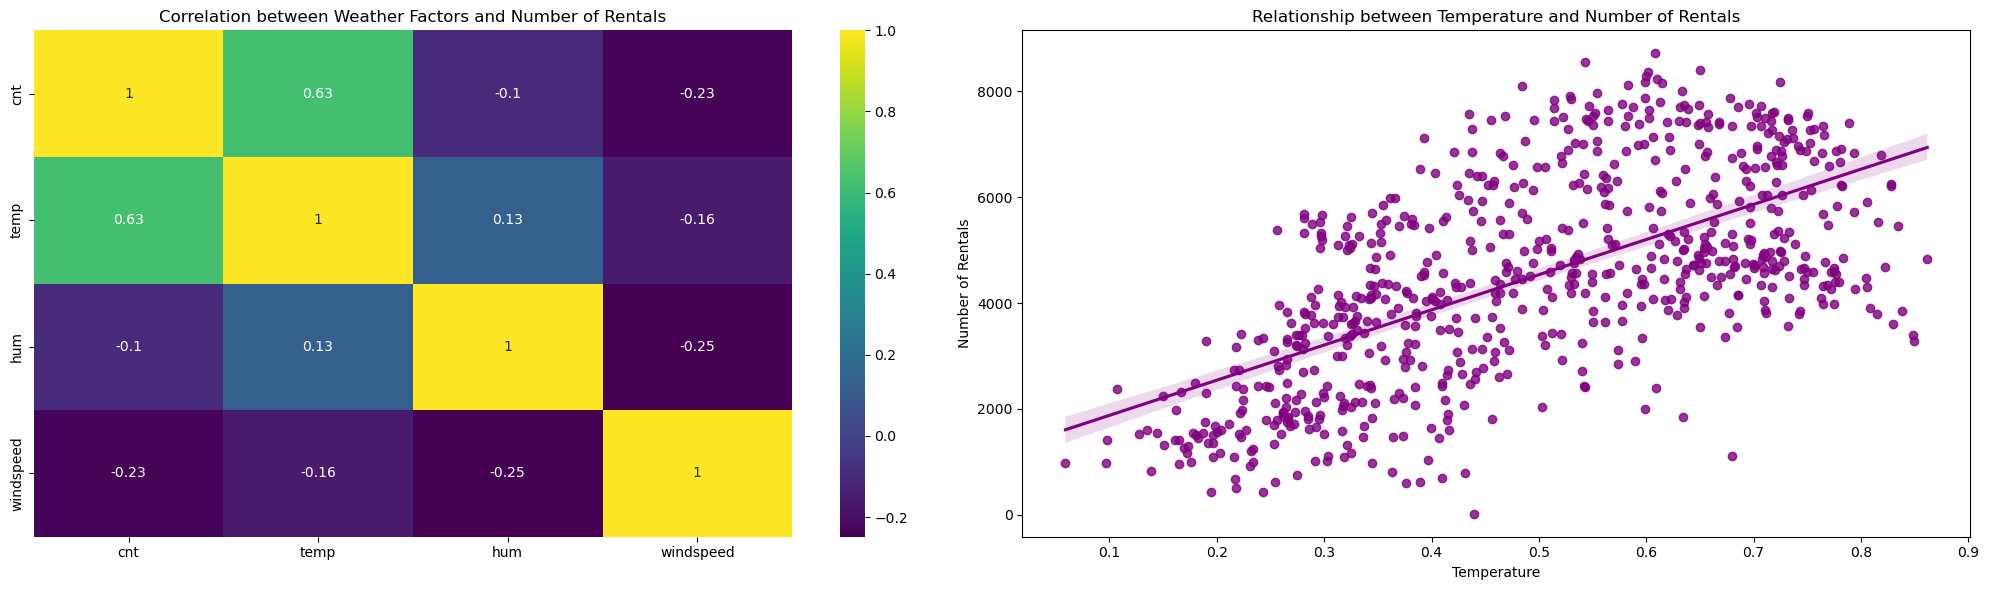

In [ ]:
#a correlation between temperature, humidity, wind speed, and the number of bike rentals
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Heatmap - Correlation Matrix
corr_matrix = df_day[["cnt", "temp", "hum", "windspeed"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="viridis", ax=axes[0])
axes[0].set_title("Correlation between Weather Factors and Number of Rentals")

# Scatter Plot with Correlation Line - Temp vs. Rentals
sns.regplot(x="temp", y="cnt", data=df_day, ax=axes[1], color="purple")
axes[1].set_title("Relationship between Temperature and Number of Rentals")
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("Number of Rentals")

plt.tight_layout()
plt.show()

### Insight
**Correlation between Weather Factors and Number of Rentals (Heatmap - Left):**
- Temperature has a good positive link (0.63) with bike rentals, so when it’s warmer, more people rent bikes.
- Humidity has a small negative effect (-0.10), meaning it doesn’t really change how many bikes are rented.
- Wind speed has a negative connection (-0.23), so stronger winds make a little less people rent, but it’s not a big impact.
- Temperature is the main weather thing affecting rentals, because warm weather feels nice for biking.
- Humidity doesn’t matter much—people care more about temperature than wet air.
- Strong winds might make biking hard, so it slightly stops people from renting.

**Relationship between Temperature and Number of Rentals (Scatter Plot - Right):**
- The scatter plot shows a clear upward trend—more temperature means more bike rentals, and the line shows this going up.
- There’s some variation in the data, but the overall trend is strongly positive.
- Warmer weather makes more people rent bikes, probably because it’s more comfortable to ride.
- But when it gets too hot (past a certain point), rentals might drop because the heat is too much.